In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../data/7e._U.S._Electric_Generating_Capacity.csv", delimiter=',', skiprows=4)
df.head()

,remove,Unnamed: 1,map,linechart,units,source key,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,7e. U.S. Electric Generating Capacity,7e. U.S. Electric Generating Capacity,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric power sector (power plants larger tha...,Electric power sector (power plants larger tha...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fossil fuel energy sources,Fossil fuel energy sources,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Natural gas,Natural gas,1,1,gigawatts at end of period,NGEPCGW_US,389.8,399.7,406.6,409.2,...,430.4,439.5,453.7,459.5,468.2,473.5,483.6,490.7,490.2,493.5
4,Coal,Coal,1,1,gigawatts at end of period,CLEPCGW_US,312.9,313.7,305.9,299.9,...,264.3,254.4,240.7,226.8,214.0,208.3,187.9,177.5,175.0,162.9


In [33]:
relevant_data = df.iloc[3:][['remove', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']]

relevant_data = relevant_data.loc[:18,:].dropna()
relevant_data.columns = ['Source', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025']
relevant_data

,Source,2018,2019,2020,2021,2022,2023,2024,2025
3,Natural gas,453.7,459.5,468.2,473.5,483.6,490.7,490.2,493.5
4,Coal,240.7,226.8,214.0,208.3,187.9,177.5,175.0,162.9
5,Petroleum,30.8,30.0,26.2,26.8,29.2,27.6,27.2,26.8
6,Other gases,0.4,0.4,0.4,0.4,0.4,0.4,0.3,0.3
8,Wind,94.3,103.5,118.0,132.6,141.3,147.6,154.5,160.1
9,Solar photovoltaic,29.7,35.3,45.8,59.5,70.8,90.0,126.5,158.1
10,Solar thermal,1.8,1.8,1.7,1.5,1.5,1.5,1.5,1.5
11,Geothermal,2.4,2.5,2.5,2.5,2.6,2.7,2.7,2.7
12,Waste biomass,4.2,3.9,3.8,3.7,2.9,2.9,2.9,2.9
13,Wood biomass,2.9,2.7,2.7,2.4,2.4,2.3,2.3,2.3


In [44]:
category_map = ['Natural gas', 'Coal', 'Nuclear', 'Wind', 'Solar', 'Battery storage']

In [114]:
consolidated_data = relevant_data.copy()
temp1 = {k:"" for k in category_map+['Others']}
for idx, row in relevant_data.iterrows():
    if row['Source'] in category_map:
        temp1[row['Source']] = row[1:]
    elif row['Source'] == 'Solar thermal' or row['Source'] == 'Solar photovoltaic':
        if type(temp1['Solar']) == str:
            temp1['Solar'] = row[1:]
        else:
            temp1['Solar'] += row[1:]
    else:
        if type(temp1['Others']) == str:
            temp1['Others'] = row[1:]
        else:
            temp1['Others'] += row[1:]

        

In [115]:
new_data = pd.DataFrame(temp1)
new_data

,Natural gas,Coal,Nuclear,Wind,Solar,Battery storage,Others
2018,453.7,240.7,99.4,94.3,31.5,0.9,143.2
2019,459.5,226.8,98.1,103.5,37.1,1.0,142.1
2020,468.2,214.0,96.5,118.0,47.5,1.5,138.4
2021,473.5,208.3,95.5,132.6,61.0,4.7,138.6
2022,483.6,187.9,94.7,141.3,72.3,9.0,140.5
2023,490.7,177.5,95.8,147.6,91.5,15.7,138.9
2024,490.2,175.0,96.9,154.5,128.0,30.9,138.4
2025,493.5,162.9,96.9,160.1,159.6,41.3,138.1


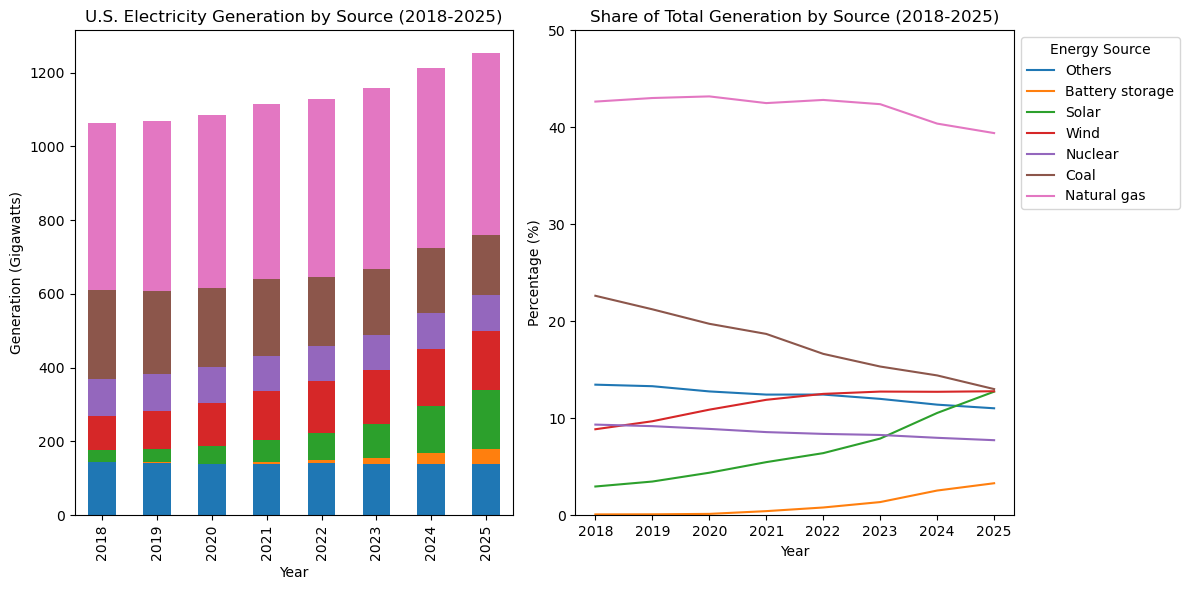

In [116]:
ordered_energy_data = new_data[['Others', 'Battery storage', 'Solar', 'Wind', 'Nuclear', 'Coal', 'Natural gas']]


# Now, let's recreate the charts with this data
plt.figure(figsize=(12, 6))

# Stacked bar chart for generation
ax1 = plt.subplot(1, 2, 1)
ordered_energy_data.plot(kind='bar', stacked=True, ax=ax1, legend=False)
ax1.set_title('U.S. Electricity Generation by Source (2018-2025)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Generation (Gigawatts)')

# Recalculate the normalized data for the line chart
normalized_energy = ordered_energy_data.div(ordered_energy_data.sum(axis=1), axis=0) * 100

# Line chart for share of generation
ax2 = plt.subplot(1, 2, 2)
normalized_energy.plot(ax=ax2)
ax2.set_title('Share of Total Generation by Source (2018-2025)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage (%)')
ax2.set_ylim(0, 50)  # Adjusting the y-axis limits to match the example
ax2.legend(title='Energy Source', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

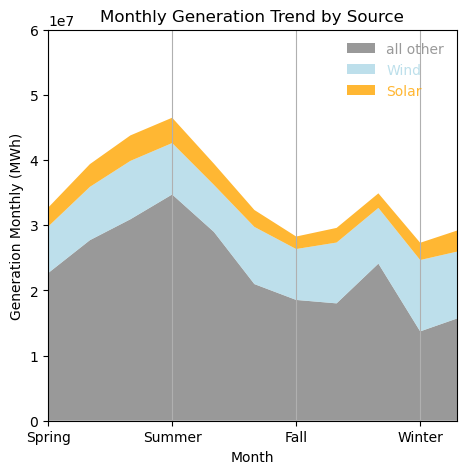

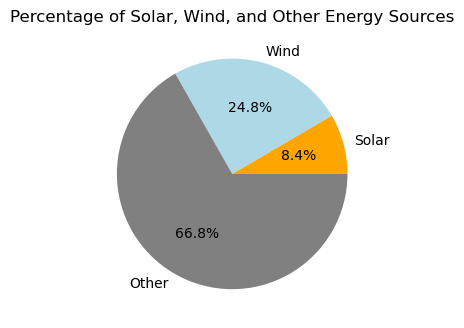

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import plotly.graph_objects as go


raw = pd.read_excel('../data/Region_TEX.xlsx', sheet_name="Daily Charts", header=1)

raw = raw[raw["Local date"] > "2023-05-1"]
raw = raw[raw["Local date"] < "2024-04-1"]

daily = raw[["Local date", "Demand", "Net generation", "Coal", "Natural gas", "Petroleum", "Hydro", "Solar", "Wind", "Other"]].dropna()

daily.to_csv('../data/daily.csv', index=False)

daily["all other"] = daily["Coal"] + daily["Natural gas"] + daily["Petroleum"] + daily["Other"] + daily["Hydro"]

data = daily.copy()
data['Local date'] = pd.to_datetime(data['Local date'])
generation_types_columns = ['all other', 'Wind', 'Solar']
data['YearMonth'] = data['Local date'].dt.to_period('M')
data = data.set_index('Local date')
monthly_data = data.groupby('YearMonth').sum()
monthly_generation_data = monthly_data[generation_types_columns]
monthly_generation_data.index = monthly_generation_data.index.to_timestamp()

plt.figure(figsize=(9, 5))

ax1 = plt.subplot(1, 2, 1)
plt.stackplot(monthly_generation_data.index, monthly_generation_data.T, labels=generation_types_columns, colors=["gray", "lightblue", "orange"], alpha=0.8)
# plt.legend(loc='upper left')
plt.xlim([pd.Timestamp('2023-05-01'), pd.Timestamp('2024-02-28')])
plt.title('Monthly Generation Trend by Source')
plt.xlabel('Month')
plt.ylabel('Generation Monthly (MWh)')
plt.grid(axis="x")
plt.ylim([0, 60000000])
plt.xticks(['2023-05','2023-08', '2023-11', '2024-02'], ["Spring", "Summer", "Fall", "Winter"])
plt.legend(frameon=False, loc='upper right', labelcolor = "linecolor", )
plt.tight_layout()
plt.show()


ax2 = plt.subplot(1, 2, 2)
total_generation = data[generation_types_columns].sum()
total_generation['Other'] = total_generation.sum() - total_generation['Solar'] - total_generation['Wind']

pie_chart_data = total_generation[['Solar', 'Wind', 'Other']]
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%', startangle=0, colors=['orange', 'lightblue', 'gray'])
plt.title('Percentage of Solar, Wind, and Other Energy Sources')
plt.tight_layout()
plt.show()